# Imports

In [1]:
import numpy as np
import math

from scipy.misc import derivative
from scipy.integrate import quad
from scipy.optimize import minimize
import sympy

import scipy.linalg
from scipy import stats

from matplotlib import pyplot as plt

import pandas as pd
from google.colab import drive

import seaborn as sb

# Задание №1

In [ ]:
my_array = np.array([i for i in range(10, 70, 2)])
print(my_array)
print("\n")

A = np.reshape(my_array, (6, 5)).transpose()

A = A*2.5
A = A-5
print(A)
print("\n")

B = np.random.randint(11, size=(6, 3))
print(B)
print("\n")

a = A.sum(axis=1)
print(a)
b = B.sum(axis=0)
print(b)
print("\n")

columns = np.array(np.random.randint(10, high=20, size=(6, 3)))
np.append(m_b, columns, axis=1)

print(np.dot(A, B))
print("\n")

A = np.delete(A, 2, 1)
print(A)
print("\n")

B = np.append(B, np.random.randint(10, 21, size=(6, 3)), axis=1)
print(B)
print("\n")

print(np.linalg.det(A), np.linalg.det(B))
print(np.linalg.inv(A) if np.linalg.det(A) else "Zero determinant\n", np.linalg.inv(B) if np.linalg.det(B) else "Zero determinant\n")
print("\n")

A = np.linalg.matrix_power(A, 6)
B = np.linalg.matrix_power(B.astype(float), 14)
print("A^6:")
print(A)
print("B^14:")
print(B)
print("\n")

equations = np.array([[3, -1.2, -8, 8], [21, -19, 0.5, 0], [7, 0, -4.9, -2], [1, -2, 13, 9]])
answers = [20, -8, 11, 3]
print(np.linalg.solve(equations, answers))


[10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48 50 52 54 56
 58 60 62 64 66 68]


[[ 20.  45.  70.  95. 120. 145.]
 [ 25.  50.  75. 100. 125. 150.]
 [ 30.  55.  80. 105. 130. 155.]
 [ 35.  60.  85. 110. 135. 160.]
 [ 40.  65.  90. 115. 140. 165.]]


[[ 9  2  9]
 [ 4  8  2]
 [ 1  1  7]
 [ 7  8  0]
 [ 3  6  4]
 [ 8  2 10]]


[495. 525. 555. 585. 615.]
[32 27 32]


[[2615. 2240. 2690.]
 [2775. 2375. 2850.]
 [2935. 2510. 3010.]
 [3095. 2645. 3170.]
 [3255. 2780. 3330.]]


[[ 20.  45.  95. 120. 145.]
 [ 25.  50. 100. 125. 150.]
 [ 30.  55. 105. 130. 155.]
 [ 35.  60. 110. 135. 160.]
 [ 40.  65. 115. 140. 165.]]


[[ 9  2  9 18 18 15]
 [ 4  8  2 13 11 15]
 [ 1  1  7 15 17 19]
 [ 7  8  0 10 15 16]
 [ 3  6  4 14 16 10]
 [ 8  2 10 12 15 12]]


0.0 288712.0000000004
Zero determinant
 [[ 0.11678074 -0.01945191 -0.08041231  0.06433401 -0.08122281 -0.01243454]
 [-0.16554213  0.12402671 -0.05993516 -0.03733478  0.07023262  0.13804414]
 [-0.15325307  0.08104963  0.00171798 -0.1013917   0

# Задание №2

In [ ]:
def y(x):
  return 2/(math.sin(x) + 4)

print(derivative(y, 2, dx=0.00001, n=1))
print(derivative(y, 2, dx=0.00001, n=2))

0.03453328592806226
0.08131106898900951


In [ ]:
x = sympy.Symbol('x')
y = 2 / (sympy.sin(x) + 4)

x0 = 2
sympy.diff(y, x)

-2*cos(x)/(sin(x) + 4)**2

In [ ]:
sympy.diff(sympy.diff(y, x), x)

2*sin(x)/(sin(x) + 4)**2 + 4*cos(x)**2/(sin(x) + 4)**3

In [ ]:
def y(x):
  return 2/(math.sin(x) + 4)

print(quad(y, 3, 6)[0])

1.8060354791119566


In [ ]:
a = 3
b = 6
y = 2 / (sympy.sin(x) + 4)
sympy.integrate(y)


4*sqrt(15)*(atan(4*sqrt(15)*tan(x/2)/15 + sqrt(15)/15) + pi*floor((x/2 - pi/2)/pi))/15

In [ ]:
def L(x):
  return (x[0]-4)**2 + (x[1]-2)**2


cons = [
    { "type" : "ineq", "fun" : lambda x : 4*x[0] + 2*x[1] - 11 },
    { "type" : "ineq", "fun" : lambda x: -2*x[0] - 7 },
    { "type" : "ineq", "fun" : lambda x: x[0] },
    { "type" : "ineq", "fun" : lambda x: x[1] },
]

if minimize(L, [5, 5], constraints=cons).success:
  print(minimize(L, [5, 5], constraints=cons).x)
else:
  print("Оптимального решения не существует")

Оптимального решения не существует


# Задание №3


In [ ]:
m1_10 = np.array([[3, -1.2, -8, 8], [21, -19, 0.5, 0], [7, 0, -4.9, -2], [1, -2, 13, 9]])

P, L, U = scipy.linalg.lu(m1_10)
print(P)
print(L)
print(U)

[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[ 1.          0.          0.          0.        ]
 [ 0.33333333  1.          0.          0.        ]
 [ 0.04761905 -0.17293233  1.          0.        ]
 [ 0.14285714  0.23909774 -0.56694215  1.        ]]
[[ 21.         -19.           0.5          0.        ]
 [  0.           6.33333333  -5.06666667  -2.        ]
 [  0.           0.          12.1          8.65413534]
 [  0.           0.           0.          13.38458957]]


In [ ]:
print(np.prod(np.diagonal(L))*np.prod(np.diagonal(U))*np.linalg.det(np.linalg.inv(P)))

-21539.82


In [ ]:
uni = np.random.uniform(10, 20, 1000).astype(int)
print("Равномерное распределение: \n", uni)
print("\nСреднее: ", np.mean(uni))
print("Мода: ", *stats.mode(uni).mode)
print("Медиана: ", np.median(uni))
print("Минимум: ", min(uni))
print("Максимум: ", max(uni), "\n")

Равномерное распределение: 
 [18 13 15 19 18 12 10 15 13 14 11 13 15 12 18 16 17 18 19 19 17 15 19 12
 16 14 13 16 15 10 17 10 13 17 16 17 16 11 14 12 15 16 11 19 19 19 16 15
 14 11 18 12 17 14 11 17 11 19 17 10 18 15 15 10 12 19 12 16 11 12 15 16
 16 11 15 14 10 15 17 13 17 19 17 17 16 11 17 16 17 16 16 13 12 12 17 18
 17 13 10 10 15 11 16 16 17 17 18 10 12 10 12 15 17 11 10 17 19 13 16 11
 19 15 12 15 11 15 16 18 10 13 16 15 12 10 17 15 17 16 11 15 15 15 19 15
 18 18 13 10 18 10 16 18 18 18 18 16 12 19 13 12 19 13 16 14 12 12 16 16
 10 19 19 10 11 14 19 19 14 19 15 10 17 12 12 12 15 16 10 14 15 17 13 14
 18 19 17 14 13 13 17 19 10 18 12 15 16 12 15 13 17 19 18 14 16 11 13 15
 19 19 16 11 11 16 10 13 14 10 16 14 15 10 12 10 12 14 11 19 15 15 14 15
 12 13 14 14 18 12 18 13 16 14 12 11 11 11 13 13 16 15 17 19 16 17 18 12
 14 18 18 17 14 14 19 16 18 16 15 10 19 14 17 19 10 13 15 13 19 16 11 17
 10 13 10 15 13 13 15 19 13 15 19 12 14 14 14 15 13 16 13 14 16 10 19 18
 16 11 10 19 12 13 17 

In [ ]:
normal = np.random.normal(15, 3, 1000).astype(int)
print("Нормальное распределение: \n", normal)
print("\nСреднее: ", np.mean(normal))
print("Мода: ", *stats.mode(normal).mode)
print("Медиана: ", np.median(normal))
print("Минимум: ", min(normal))
print("Максимум: ", max(normal), "\n")

Нормальное распределение: 
 [16 21 13  9 13 14 19 16  9 15 12 11 11 12 13 19 13 12 18 10 17 14 14 18
 18 19 17 19 17 18 17 14 13 11 19 15 12 18 16 13 18 14 13 16 17 12 12 10
 18 15 15 14 11 10 15 16 17 12 15 19 15 10 13 14 13 17 15 12 12 15 15 15
 22 20 14 12 11  8 21 12 16 15 17 10 13 10 15 13 13 11 18 16 17  8 12 16
 18 17 12 14  8 17 12 17 11 11 13 17 17  8 11 11 10 16 16 13 16 15 19 20
 15 16 15 12 19 11 12  8  6 12 17 19 17 17 14 16 14 16 18 13 12 10 11 10
 13 16 20 14 11 10 11 16 15 16 20 17 14 13 15 16 15  8 17 17 12 13 16 16
  9 10 11 15 18 17 19 15 10 21 16 13 14 17 15 12 13 12 11 13 12 17 14 15
 14  7 15 14 12 14 17  9 17 18 19 19 16 17  8 15 13 16 22 12 19 16 15 11
 19 13 18 13 10 16 18 16 17 11 11 12 12 15 17 15 15 12 12 10 12 19 12 11
 13 16 11 13 12 16 23 17  3 14 15 19  8 17 20 13 16 15 12 14 16 19  9 10
 13 21 13 12 14 15 15 15 14 17 22 14 24 19 15 12 17 19 13 14 12 14 16 18
 15 18 14 20  7 13 10 13 17 18  8 15 12  9 14 12 10 17 16 20 12 14 20 13
 15 19 14 14 12 20 13 1

In [ ]:
print(stats.chisquare(uni).pvalue)
print(stats.chisquare(normal).pvalue)

1.0
0.9999999999999937


# Задание №4


In [ ]:
x = np.linspace(3, 6, 100)
y = 2 / (np.sin(x) + 4)
print(y)

[0.48296113 0.48649253 0.4900882  0.49374647 0.49746552 0.50124338
 0.50507789 0.50896673 0.51290742 0.51689726 0.52093336 0.52501265
 0.52913183 0.53328741 0.53747566 0.54169264 0.54593419 0.55019591
 0.55447317 0.55876113 0.56305469 0.56734854 0.57163715 0.57591474
 0.58017533 0.58441276 0.58862061 0.59279233 0.59692116 0.60100019
 0.60502236 0.60898048 0.61286728 0.61667536 0.62039731 0.62402565
 0.6275529  0.63097162 0.6342744  0.63745393 0.64050301 0.64341458
 0.64618178 0.64879796 0.65125674 0.65355199 0.65567794 0.65762914
 0.65940054 0.6609875  0.66238581 0.66359175 0.66460207 0.66541402
 0.66602539 0.66643451 0.66664025 0.66664205 0.66643991 0.66603438
 0.66542657 0.66461815 0.66361132 0.66240881 0.66101386 0.6594302
 0.65766202 0.65571395 0.65359105 0.65129874 0.6488428  0.64622934
 0.64346475 0.64055568 0.63750897 0.63433169 0.63103102 0.62761429
 0.62408888 0.62046227 0.61674191 0.61293528 0.60904981 0.60509289
 0.60107179 0.5969937  0.59286569 0.58869467 0.5844874  0.58025

''

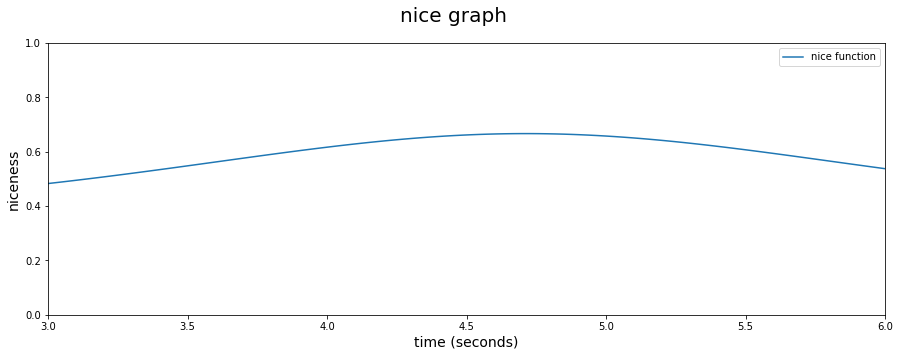

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5))
axes.plot(x, y, label="nice function")
axes.set_xlim(3, 6)
axes.set_ylim(0, 1)
axes.legend()
fig.suptitle("nice graph", fontsize=20)
plt.xlabel("time (seconds)", fontsize=14)
plt.ylabel("niceness", fontsize=14)
;

''

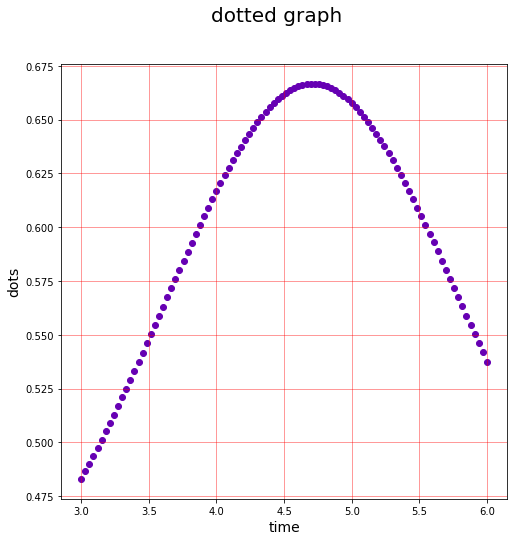

In [ ]:
fig1, axes1 = plt.subplots(1, 1, figsize=(8, 8))
axes1.scatter(x,y, color=(0.4, 0, 0.7))
fig1.suptitle("dotted graph", fontsize=20)
axes1.grid(color=(1, 0, 0), alpha=0.5)
plt.xlabel("time", fontsize=14)
plt.ylabel("dots", fontsize=14)
;

''

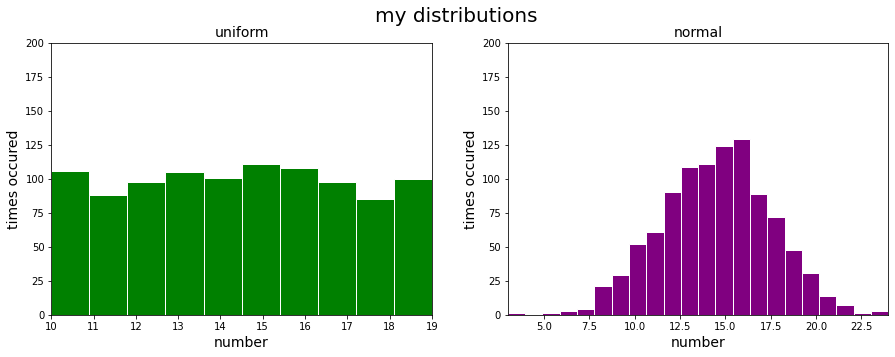

In [ ]:
fig2, axes2 = plt.subplots(1, 2, figsize=(15,5))
N, bins, patches = axes2[0].hist(uni, bins=10, color='green', edgecolor='white')
axes2[0].set_title("uniform", fontsize=14)
fig2.suptitle("my distributions", fontsize=20)
axes2[0].set_xlim(10, 19)
axes2[0].set_ylim(0, 200)
axes2[0].set_xlabel("number", fontsize=14)
axes2[0].set_ylabel("times occured",fontsize=14)

N, bins, patches = axes2[1].hist(normal, bins=max(normal)-min(normal)+1, color='purple', edgecolor='white')
axes2[1].set_title("normal", fontsize=14)
axes2[1].set_xlim(min(normal), max(normal))
axes2[1].set_ylim(0, 200)
axes2[1].set_xlabel("number", fontsize=14)
axes2[1].set_ylabel("times occured",fontsize=14)
;

''

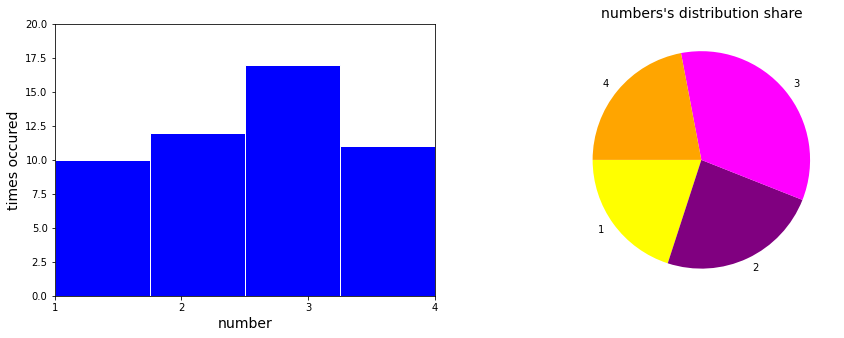

In [ ]:
uni1 = np.random.uniform(1, 5, 50).astype(int)
unique, counts = np.unique(uni1, return_counts=True)
fig3, axes3 = plt.subplots(1, 2, figsize=(15,5))
N, bins, patches = axes3[0].hist(uni1, bins=4, color='blue', edgecolor='white')
axes3[0].set_xlim(1, 4)
axes3[0].set_ylim(0, 20)
axes3[0].set_xticks([1,2,3,4])
axes3[0].set_xlabel("number", fontsize=14)
axes3[0].set_ylabel("times occured",fontsize=14)


pie_colors = ['yellow', 'purple', 'magenta', 'orange']
axes3[1].pie(counts, labels=unique, colors=pie_colors, startangle=180)
axes3[1].set_title("numbers's distribution share", fontsize=14)
;

''

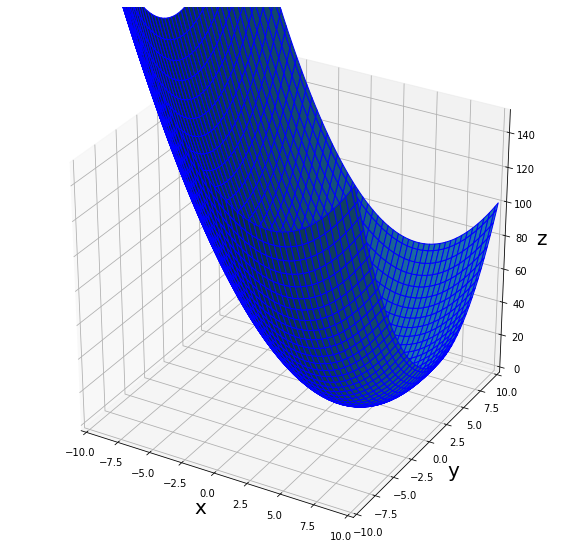

In [ ]:
fig4, axes4 = plt.figure(figsize=(10,10)), plt.axes(projection='3d')
axes4.set_xlim(-10, 10)
axes4.set_ylim(-10, 10)
axes4.set_zlim(0, 150)
axes4.set_xlabel('x', fontsize=20)
axes4.set_ylabel('y', fontsize=20)
axes4.set_zlabel('z', fontsize=20)
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
zs = np.array((np.ravel(X)-4)**2 + (np.ravel(Y)-2)**2)
Z = zs.reshape(X.shape)
axes4.plot_surface(X, Y, Z, edgecolors='blue')
;

In [ ]:
def task6():

  x = np.linspace(3, 6, 100)
  y = 2 / (np.sin(x) + 4)

  fig5, axes5 = plt.subplots(2, 2, figsize=(10, 10))
  fig5.suptitle("4 graphs", fontsize=17)
  axes5[0,0].plot(x, y, label="nice function")
  axes5[0,0].set_xlim(3, 6)
  axes5[0,0].set_ylim(0, 1)
  axes5[0,0].set_facecolor('yellow')
  axes5[0,0].legend()
  axes5[0,0].set_xlabel("time (seconds)", fontsize=10)
  axes5[0,0].set_ylabel("niceness", fontsize=10)


  axes5[0,1].scatter(x,y, color=(0.4, 0, 0.7))
  axes5[0,1].grid(color=(1, 0, 0), alpha=0.5)
  axes5[0,1].set_xlabel("time", fontsize=10)
  axes5[0,1].set_ylabel("dots", fontsize=10)


  axes5[1,0].pie(counts, labels=unique, colors=pie_colors, startangle=180)
  axes5[1,0].set_title("numbers's distribution share", fontsize=12)


  ax = fig5.add_subplot(224, projection='3d')
  axes5[1,1].axis('off')
  ax.set_xlim(-10, 10)
  ax.set_ylim(-10, 10)
  ax.set_zlim(0, 150)
  ax.set_xlabel('x', fontsize=10)
  ax.set_ylabel('y', fontsize=10)
  ax.set_zlabel('z', fontsize=10)
  x = np.linspace(-10, 10, 100)
  y = np.linspace(-10, 10, 100)
  X, Y = np.meshgrid(x, y)
  zs = np.array((np.ravel(X)-4)**2 + (np.ravel(Y)-2)**2)
  Z = zs.reshape(X.shape)
  ax.plot_surface(X, Y, Z, edgecolors='blue')
  ;


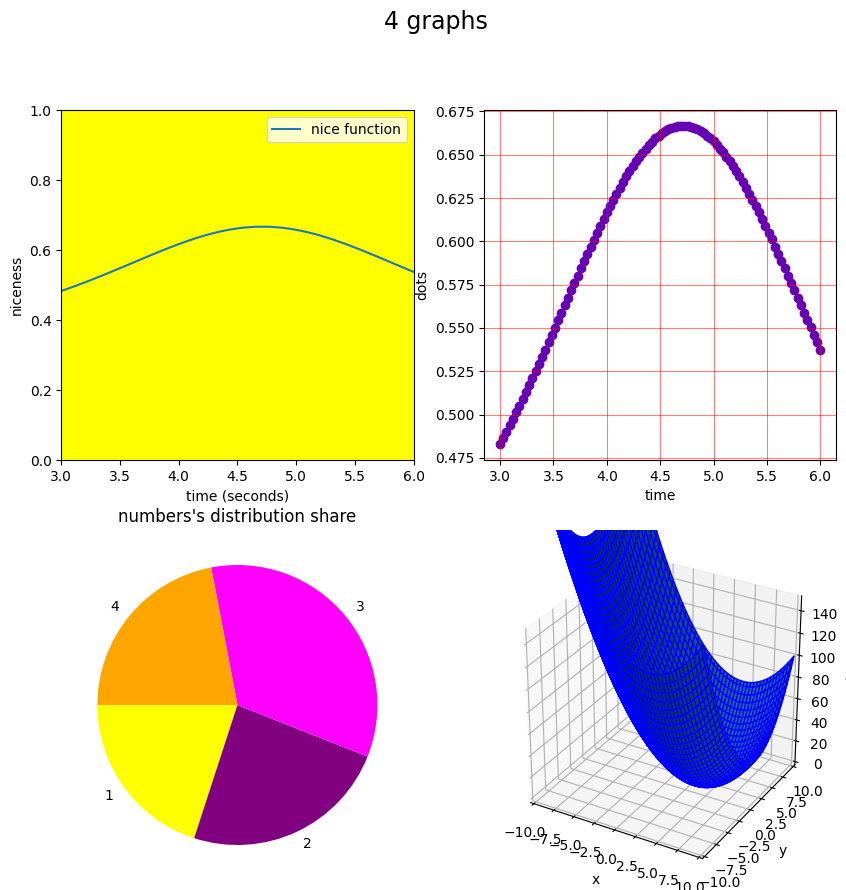

In [ ]:
plt.style.use('default')
task6()

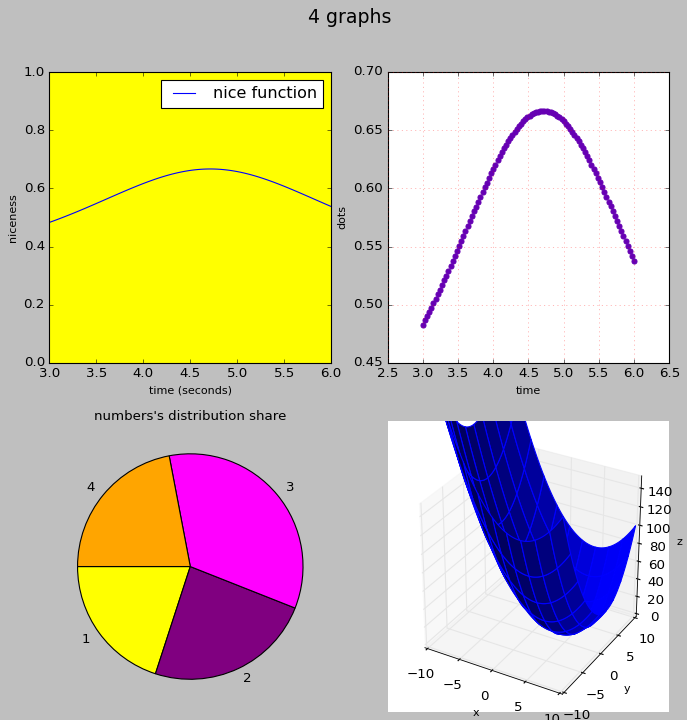

In [ ]:
plt.style.use('classic')
task6()

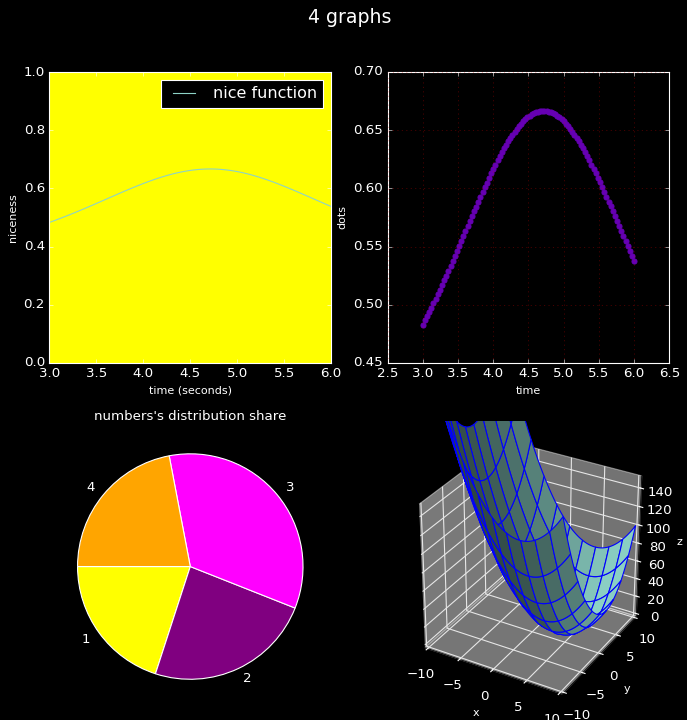

In [ ]:
plt.style.use('dark_background')
task6()

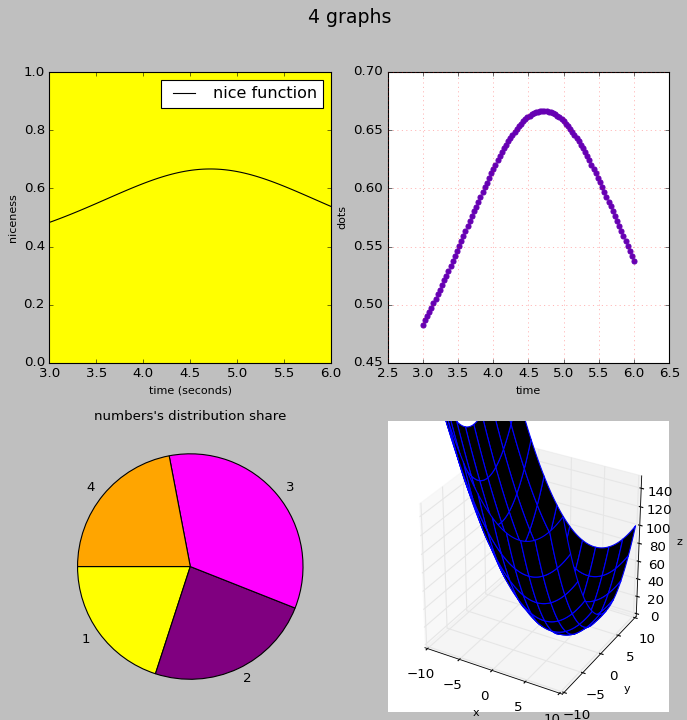

In [ ]:
plt.style.use('grayscale')
task6()

# Задание №5

In [ ]:
data1 = pd.DataFrame(columns=['Name', 'Age', 'Sex'], data=[
    ['Strom, Mrs. Wilhelm (Elna Matilda Persson)', 29, 'female'],
    ['Navratil, Mr. Michel ("Louis M Hoffman")', 36.5, 'male'],
    ['Minahan, Miss. Daisy E', 33, 'female'],
])
data1

,Name,Age,Sex
0,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",29.0,female
1,"Navratil, Mr. Michel (""Louis M Hoffman"")",36.5,male
2,"Minahan, Miss. Daisy E",33.0,female


In [ ]:
drive.mount("/content/drive")
data2 = pd.read_csv('/content/drive/MyDrive/titanic_csv.csv', sep=';')
data2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,454,1,1,"Goldenberg, Mr. Samuel L",male,49.0,1,0,17453,89.1042,C92,C
1,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S
2,556,0,1,"Wright, Mr. George",male,62.0,0,0,113807,26.5500,NaN,S
3,766,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.0,1,0,13502,77.9583,D11,S
4,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
489,363,0,3,"Barbara, Mrs. (Catherine David)",female,45.0,0,1,2691,14.4542,NaN,C
490,447,1,2,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S
491,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,NaN,S
492,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,NaN,S


In [ ]:
data3 = pd.read_csv('https://gist.githubusercontent.com/zaryanezrya/8b4ef51c707cb16d5e88a44dc00a1bb2/raw/41230f49c6268e072dbf102672f670be256922ab/gistfile1.txt')
data3

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,552,0,2,"Sharp, Mr. Percival James R",male,27.0,0,0,244358,26.0000,NaN,S
1,689,0,3,"Fischer, Mr. Eberhard Thelander",male,18.0,0,0,350036,7.7958,NaN,S
2,605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.5500,NaN,C
3,305,0,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S
4,290,1,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
495,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
496,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S
497,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
498,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C


In [ ]:
concat_data23 = pd.concat([data2, data3.rename(columns={
    'passengerid' : 'PassengerId',
    'survived' : 'Survived',
    'pclass' : 'Pclass',
    'name' : 'Name',
    'sex' : 'Sex',
    'age' : 'Age',
    'sibsp' : 'SibSp',
    'parch' : 'Parch',
    'ticket' : 'Ticket',
    'fare' : 'Fare',
    'cabin' : 'Cabin',
    'embarked' : 'Embarked',

})])
concat_data23.drop_duplicates(inplace=True, subset='PassengerId')
# concat_data23.drop(columns='index', inplace=True)
concat_data23

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,454,1,1,"Goldenberg, Mr. Samuel L",male,49.0,1,0,17453,89.1042,C92,C
1,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S
2,556,0,1,"Wright, Mr. George",male,62.0,0,0,113807,26.5500,NaN,S
3,766,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.0,1,0,13502,77.9583,D11,S
4,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
493,445,1,3,"Johannesen-Bratthammer, Mr. Bernt",male,NaN,0,0,65306,8.1125,NaN,S
494,640,0,3,"Thorneycroft, Mr. Percival",male,NaN,1,0,376564,16.1000,NaN,S
497,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
498,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C


In [ ]:
concat_data23.set_index(keys='PassengerId', inplace=True)
concat_data23.sort_index(inplace=True)
concat_data23

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
concat_data23.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
concat_data23.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
zero, second = concat_data23.iloc[0], concat_data23.iloc[2]
t = concat_data23.iloc[0].copy()
concat_data23.iloc[0] = second
concat_data23.iloc[2] = t 
concat_data23

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
concat_data23['Sex'] = concat_data23['Sex'].map({
    'female' : 'f',
    'male' : 'm'
}, na_action='ignore')
concat_data23

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,1,3,"Heikkinen, Miss. Laina",f,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",f,38.0,1,0,PC 17599,71.2833,C85,C
3,0,3,"Braund, Mr. Owen Harris",m,22.0,1,0,A/5 21171,7.2500,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",f,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",m,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",m,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",f,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",f,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
concat_data23.groupby('Ticket').filter(lambda x:(len(x) > 5))

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
14,0,3,"Andersson, Mr. Anders Johan",m,39.0,1,5,347082,31.2750,NaN,S
51,0,3,"Panula, Master. Juha Niilo",m,7.0,4,1,3101295,39.6875,NaN,S
60,0,3,"Goodwin, Master. William Frederick",m,11.0,5,2,CA 2144,46.9000,NaN,S
64,0,3,"Skoog, Master. Harald",m,4.0,3,2,347088,27.9000,NaN,S
72,0,3,"Goodwin, Miss. Lillian Amy",f,16.0,5,2,CA 2144,46.9000,NaN,S
75,1,3,"Bing, Mr. Lee",m,32.0,0,0,1601,56.4958,NaN,S
120,0,3,"Andersson, Miss. Ellis Anna Maria",f,2.0,4,2,347082,31.2750,NaN,S
160,0,3,"Sage, Master. Thomas Henry",m,NaN,8,2,CA. 2343,69.5500,NaN,S
165,0,3,"Panula, Master. Eino Viljami",m,1.0,4,1,3101295,39.6875,NaN,S


In [ ]:
data1

,Name,Age,Sex
0,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",29.0,female
1,"Navratil, Mr. Michel (""Louis M Hoffman"")",36.5,male
2,"Minahan, Miss. Daisy E",33.0,female


In [ ]:
def companions_by_name(df, name):
  return df.groupby(['Cabin']).get_group(df.loc[df['Name'] == name].iloc[0]['Cabin'])

In [ ]:
# print(companions_by_name(concat_data23, 'Navratil, Mr. Michel ("Louis M Hoffman")').count()['Survived'])
concat_data23.groupby(['Cabin']).get_group(concat_data23.loc[concat_data23['Name'] == 'Strom, Mrs. Wilhelm (Elna Matilda Persson)'].iloc[0]['Cabin'])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
11,1,3,"Sandstrom, Miss. Marguerite Rut",f,4.0,1,1,PP 9549,16.7000,G6,S
206,0,3,"Strom, Miss. Telma Matilda",f,2.0,0,1,347054,10.4625,G6,S
252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",f,29.0,1,1,347054,10.4625,G6,S
395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",f,24.0,0,2,PP 9549,16.7000,G6,S


In [ ]:
concat_data23.groupby(['Cabin']).get_group(concat_data23.loc[concat_data23['Name'] == 'Navratil, Mr. Michel ("Louis M Hoffman")'].iloc[0]['Cabin'])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",m,36.5,0,2,230080,26.0,F2,S
194,1,2,"Navratil, Master. Michel M",m,3.0,1,1,230080,26.0,F2,S
341,1,2,"Navratil, Master. Edmond Roger",m,2.0,1,1,230080,26.0,F2,S


In [ ]:
concat_data23.groupby(['Cabin']).get_group(concat_data23.loc[concat_data23['Name'] == 'Minahan, Miss. Daisy E'].iloc[0]['Cabin'])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
246,0,1,"Minahan, Dr. William Edward",m,44.0,2,0,19928,90.0,C78,Q
413,1,1,"Minahan, Miss. Daisy E",f,33.0,1,0,19928,90.0,C78,Q


In [ ]:
concat_data23['BirthYear'] = concat_data23['Age'].map(lambda x : int(1912 - x) if not math.isnan(x) else float('nan'))
concat_data23

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,BirthYear
PassengerId,,,,,,,,,,,,
1,1,3,"Heikkinen, Miss. Laina",f,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1886.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",f,38.0,1,0,PC 17599,71.2833,C85,C,1874.0
3,0,3,"Braund, Mr. Owen Harris",m,22.0,1,0,A/5 21171,7.2500,NaN,S,1890.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",f,35.0,1,0,113803,53.1000,C123,S,1877.0
5,0,3,"Allen, Mr. William Henry",m,35.0,0,0,373450,8.0500,NaN,S,1877.0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",m,27.0,0,0,211536,13.0000,NaN,S,1885.0
888,1,1,"Graham, Miss. Margaret Edith",f,19.0,0,0,112053,30.0000,B42,S,1893.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",f,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN


In [ ]:
concat_data23['Companion'] = concat_data23['Name'].map(lambda x : companions_by_name(concat_data23, x).count()['Survived'] if type(concat_data23.loc[concat_data23['Name']==x].iloc[0]['Cabin']) == str else 'unknown')
concat_data23

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,BirthYear,Companion
PassengerId,,,,,,,,,,,,,
1,1,3,"Heikkinen, Miss. Laina",f,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1886.0,unknown
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",f,38.0,1,0,PC 17599,71.2833,C85,C,1874.0,1
3,0,3,"Braund, Mr. Owen Harris",m,22.0,1,0,A/5 21171,7.2500,NaN,S,1890.0,unknown
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",f,35.0,1,0,113803,53.1000,C123,S,1877.0,2
5,0,3,"Allen, Mr. William Henry",m,35.0,0,0,373450,8.0500,NaN,S,1877.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",m,27.0,0,0,211536,13.0000,NaN,S,1885.0,unknown
888,1,1,"Graham, Miss. Margaret Edith",f,19.0,0,0,112053,30.0000,B42,S,1893.0,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",f,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,unknown


In [ ]:
zero, second = concat_data23.iloc[0], concat_data23.iloc[1]
t = concat_data23.iloc[0].copy()
concat_data23.iloc[0] = second
concat_data23.iloc[1] = t 
concat_data23

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,BirthYear,Companion
PassengerId,,,,,,,,,,,,,
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",f,38.0,1,0,PC 17599,71.2833,C85,C,1874.0,1
2,1,3,"Heikkinen, Miss. Laina",f,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1886.0,unknown
3,0,3,"Braund, Mr. Owen Harris",m,22.0,1,0,A/5 21171,7.2500,NaN,S,1890.0,unknown
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",f,35.0,1,0,113803,53.1000,C123,S,1877.0,2
5,0,3,"Allen, Mr. William Henry",m,35.0,0,0,373450,8.0500,NaN,S,1877.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",m,27.0,0,0,211536,13.0000,NaN,S,1885.0,unknown
888,1,1,"Graham, Miss. Margaret Edith",f,19.0,0,0,112053,30.0000,B42,S,1893.0,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",f,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,unknown


In [ ]:
concat_data23.to_csv(r'/content/drive/MyDrive/titanic_edited_csv.csv', index=False, header=True)

In [ ]:
concat_data23.sort_values(by=['Fare'], ascending=False).head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,BirthYear,Companion
PassengerId,,,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",f,35.0,0,0,PC 17755,512.3292,NaN,C,1877.0,unknown
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",m,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1876.0,2
738,1,1,"Lesurer, Mr. Gustave J",m,35.0,0,0,PC 17755,512.3292,B101,C,1877.0,1
28,0,1,"Fortune, Mr. Charles Alexander",m,19.0,3,2,19950,263.0000,C23 C25 C27,S,1893.0,4
439,0,1,"Fortune, Mr. Mark",m,64.0,1,4,19950,263.0000,C23 C25 C27,S,1848.0,4
89,1,1,"Fortune, Miss. Mabel Helen",f,23.0,3,2,19950,263.0000,C23 C25 C27,S,1889.0,4
342,1,1,"Fortune, Miss. Alice Elizabeth",f,24.0,3,2,19950,263.0000,C23 C25 C27,S,1888.0,4
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",f,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,1891.0,2
312,1,1,"Ryerson, Miss. Emily Borie",f,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,1894.0,2


In [ ]:
concat_data23.groupby(['Sex', 'Survived']).count()['Name']

Sex  Survived
f    0            81
     1           233
m    0           468
     1           109
Name: Name, dtype: int64

In [ ]:
concat_data23.groupby(['Pclass', 'Survived']).count()['Name']

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Name, dtype: int64

# Задание №6


In [24]:
drive.mount("/content/drive")
reports = pd.read_csv('/content/drive/MyDrive/PRAKTIKUM 6/nhsta_complaints_tesla.csv', sep=',')
reports

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,odiNumber,manufacturer,crash,fire,numberOfInjuries,numberOfDeaths,dateOfIncident,dateComplaintFiled,vin,components,summary,type,productYear,productMake,productModel
0,11444023,"Tesla, Inc.",False,False,0,0,11/18/2021,12/16/2021,5yjsa1cn8cf,ELECTRICAL SYSTEM,I appears that Tesla had capped my battery. I ...,Vehicle,2012,TESLA,MODEL S
1,11442524,"Tesla, Inc.",False,False,0,0,12/01/2021,12/03/2021,5YJSA1DPXCF,"ELECTRICAL SYSTEM,VISIBILITY/WIPER",The vehicle was not experiencing display or re...,Vehicle,2012,TESLA,MODEL S
2,11441219,"Tesla, Inc.",False,False,0,0,11/19/2021,11/21/2021,5YJSA1CN3CF,"ELECTRICAL SYSTEM,UNKNOWN OR OTHER",MCU failure after 12 months replacement that I...,Vehicle,2012,TESLA,MODEL S
3,11435793,"Tesla, Inc.",False,False,0,0,10/05/2021,10/06/2021,5YJSA1DPXCF,"ELECTRICAL SYSTEM,EXTERIOR LIGHTING","As the car drains the battery pretty quickly, ...",Vehicle,2012,TESLA,MODEL S
4,11434130,"Tesla, Inc.",False,False,0,0,09/22/2021,09/23/2021,5yjsa1cp0cf,"EXTERIOR LIGHTING,VISIBILITY,BACK OVER PREVENTION",The contact owns a 2012 Tesla Model S. The con...,Vehicle,2012,TESLA,MODEL S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,11462408,"Tesla, Inc.",False,False,0,0,04/25/2022,04/27/2022,7SAXCBE50NF,WHEELS,I was driving on the road send out of no where...,Vehicle,2022,TESLA,MODEL X
2079,11459186,"Tesla, Inc.",False,False,0,0,03/28/2022,04/01/2022,7SAXCBE62NF,"AIR BAGS,SEAT BELTS,UNKNOWN OR OTHER",Car is displaying a warning reading “Rear righ...,Vehicle,2022,TESLA,MODEL X
2080,11458566,"Tesla, Inc.",False,False,0,0,03/27/2022,03/28/2022,7SAXCBE58NF,"VEHICLE SPEED CONTROL,SERVICE BRAKES,FORWARD C...",Vehicle repeatedly applied the brakes while on...,Vehicle,2022,TESLA,MODEL X
2081,11456483,"Tesla, Inc.",True,False,0,0,03/12/2022,03/13/2022,7SAXCBE51NF,LANE DEPARTURE,While driving my 2022 model x in full self dri...,Vehicle,2022,TESLA,MODEL X


In [25]:
reports.head(5)

,odiNumber,manufacturer,crash,fire,numberOfInjuries,numberOfDeaths,dateOfIncident,dateComplaintFiled,vin,components,summary,type,productYear,productMake,productModel
0,11444023,"Tesla, Inc.",False,False,0,0,11/18/2021,12/16/2021,5yjsa1cn8cf,ELECTRICAL SYSTEM,I appears that Tesla had capped my battery. I ...,Vehicle,2012,TESLA,MODEL S
1,11442524,"Tesla, Inc.",False,False,0,0,12/01/2021,12/03/2021,5YJSA1DPXCF,"ELECTRICAL SYSTEM,VISIBILITY/WIPER",The vehicle was not experiencing display or re...,Vehicle,2012,TESLA,MODEL S
2,11441219,"Tesla, Inc.",False,False,0,0,11/19/2021,11/21/2021,5YJSA1CN3CF,"ELECTRICAL SYSTEM,UNKNOWN OR OTHER",MCU failure after 12 months replacement that I...,Vehicle,2012,TESLA,MODEL S
3,11435793,"Tesla, Inc.",False,False,0,0,10/05/2021,10/06/2021,5YJSA1DPXCF,"ELECTRICAL SYSTEM,EXTERIOR LIGHTING","As the car drains the battery pretty quickly, ...",Vehicle,2012,TESLA,MODEL S
4,11434130,"Tesla, Inc.",False,False,0,0,09/22/2021,09/23/2021,5yjsa1cp0cf,"EXTERIOR LIGHTING,VISIBILITY,BACK OVER PREVENTION",The contact owns a 2012 Tesla Model S. The con...,Vehicle,2012,TESLA,MODEL S


In [26]:
reports.tail(5)

,odiNumber,manufacturer,crash,fire,numberOfInjuries,numberOfDeaths,dateOfIncident,dateComplaintFiled,vin,components,summary,type,productYear,productMake,productModel
2078,11462408,"Tesla, Inc.",False,False,0,0,04/25/2022,04/27/2022,7SAXCBE50NF,WHEELS,I was driving on the road send out of no where...,Vehicle,2022,TESLA,MODEL X
2079,11459186,"Tesla, Inc.",False,False,0,0,03/28/2022,04/01/2022,7SAXCBE62NF,"AIR BAGS,SEAT BELTS,UNKNOWN OR OTHER",Car is displaying a warning reading “Rear righ...,Vehicle,2022,TESLA,MODEL X
2080,11458566,"Tesla, Inc.",False,False,0,0,03/27/2022,03/28/2022,7SAXCBE58NF,"VEHICLE SPEED CONTROL,SERVICE BRAKES,FORWARD C...",Vehicle repeatedly applied the brakes while on...,Vehicle,2022,TESLA,MODEL X
2081,11456483,"Tesla, Inc.",True,False,0,0,03/12/2022,03/13/2022,7SAXCBE51NF,LANE DEPARTURE,While driving my 2022 model x in full self dri...,Vehicle,2022,TESLA,MODEL X
2082,11456281,"Tesla, Inc.",False,False,0,0,03/11/2022,03/11/2022,7saxcbe51nf,"ELECTRICAL SYSTEM,SERVICE BRAKES,FUEL/PROPULSI...",While driving the electronic systems that moni...,Vehicle,2022,TESLA,MODEL X


In [27]:
reports.describe()

,odiNumber,numberOfInjuries,numberOfDeaths,productYear
count,2.083000e+03,2083.000000,2083.000000,2083.000000
mean,1.134628e+07,0.049928,0.007201,2040.686990
std,1.745801e+05,0.324183,0.095257,427.854819
min,1.049845e+07,0.000000,0.000000,2012.000000
25%,1.133052e+07,0.000000,0.000000,2014.000000
50%,1.141964e+07,0.000000,0.000000,2018.000000
75%,1.145231e+07,0.000000,0.000000,2021.000000
max,1.146717e+07,7.000000,2.000000,9999.000000


In [28]:
reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083 entries, 0 to 2082
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   odiNumber           2083 non-null   int64 
 1   manufacturer        2083 non-null   object
 2   crash               2083 non-null   bool  
 3   fire                2083 non-null   bool  
 4   numberOfInjuries    2083 non-null   int64 
 5   numberOfDeaths      2083 non-null   int64 
 6   dateOfIncident      2083 non-null   object
 7   dateComplaintFiled  2083 non-null   object
 8   vin                 2026 non-null   object
 9   components          2083 non-null   object
 10  summary             2083 non-null   object
 11  type                2083 non-null   object
 12  productYear         2083 non-null   int64 
 13  productMake         2083 non-null   object
 14  productModel        2083 non-null   object
dtypes: bool(2), int64(4), object(9)
memory usage: 215.7+ KB


In [29]:
reports.drop_duplicates(inplace=True)
reports

,odiNumber,manufacturer,crash,fire,numberOfInjuries,numberOfDeaths,dateOfIncident,dateComplaintFiled,vin,components,summary,type,productYear,productMake,productModel
0,11444023,"Tesla, Inc.",False,False,0,0,11/18/2021,12/16/2021,5yjsa1cn8cf,ELECTRICAL SYSTEM,I appears that Tesla had capped my battery. I ...,Vehicle,2012,TESLA,MODEL S
1,11442524,"Tesla, Inc.",False,False,0,0,12/01/2021,12/03/2021,5YJSA1DPXCF,"ELECTRICAL SYSTEM,VISIBILITY/WIPER",The vehicle was not experiencing display or re...,Vehicle,2012,TESLA,MODEL S
2,11441219,"Tesla, Inc.",False,False,0,0,11/19/2021,11/21/2021,5YJSA1CN3CF,"ELECTRICAL SYSTEM,UNKNOWN OR OTHER",MCU failure after 12 months replacement that I...,Vehicle,2012,TESLA,MODEL S
3,11435793,"Tesla, Inc.",False,False,0,0,10/05/2021,10/06/2021,5YJSA1DPXCF,"ELECTRICAL SYSTEM,EXTERIOR LIGHTING","As the car drains the battery pretty quickly, ...",Vehicle,2012,TESLA,MODEL S
4,11434130,"Tesla, Inc.",False,False,0,0,09/22/2021,09/23/2021,5yjsa1cp0cf,"EXTERIOR LIGHTING,VISIBILITY,BACK OVER PREVENTION",The contact owns a 2012 Tesla Model S. The con...,Vehicle,2012,TESLA,MODEL S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,11462408,"Tesla, Inc.",False,False,0,0,04/25/2022,04/27/2022,7SAXCBE50NF,WHEELS,I was driving on the road send out of no where...,Vehicle,2022,TESLA,MODEL X
2079,11459186,"Tesla, Inc.",False,False,0,0,03/28/2022,04/01/2022,7SAXCBE62NF,"AIR BAGS,SEAT BELTS,UNKNOWN OR OTHER",Car is displaying a warning reading “Rear righ...,Vehicle,2022,TESLA,MODEL X
2080,11458566,"Tesla, Inc.",False,False,0,0,03/27/2022,03/28/2022,7SAXCBE58NF,"VEHICLE SPEED CONTROL,SERVICE BRAKES,FORWARD C...",Vehicle repeatedly applied the brakes while on...,Vehicle,2022,TESLA,MODEL X
2081,11456483,"Tesla, Inc.",True,False,0,0,03/12/2022,03/13/2022,7SAXCBE51NF,LANE DEPARTURE,While driving my 2022 model x in full self dri...,Vehicle,2022,TESLA,MODEL X


In [30]:
reports.reset_index(drop=True, inplace=True)
reports = reports[reports.productYear < 2023] # есть элементы где год производства = 9999 :/

In [31]:
reports.rename(columns={
    'summary' : 'description'
}, inplace=True)
reports

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,odiNumber,manufacturer,crash,fire,numberOfInjuries,numberOfDeaths,dateOfIncident,dateComplaintFiled,vin,components,description,type,productYear,productMake,productModel
0,11444023,"Tesla, Inc.",False,False,0,0,11/18/2021,12/16/2021,5yjsa1cn8cf,ELECTRICAL SYSTEM,I appears that Tesla had capped my battery. I ...,Vehicle,2012,TESLA,MODEL S
1,11442524,"Tesla, Inc.",False,False,0,0,12/01/2021,12/03/2021,5YJSA1DPXCF,"ELECTRICAL SYSTEM,VISIBILITY/WIPER",The vehicle was not experiencing display or re...,Vehicle,2012,TESLA,MODEL S
2,11441219,"Tesla, Inc.",False,False,0,0,11/19/2021,11/21/2021,5YJSA1CN3CF,"ELECTRICAL SYSTEM,UNKNOWN OR OTHER",MCU failure after 12 months replacement that I...,Vehicle,2012,TESLA,MODEL S
3,11435793,"Tesla, Inc.",False,False,0,0,10/05/2021,10/06/2021,5YJSA1DPXCF,"ELECTRICAL SYSTEM,EXTERIOR LIGHTING","As the car drains the battery pretty quickly, ...",Vehicle,2012,TESLA,MODEL S
4,11434130,"Tesla, Inc.",False,False,0,0,09/22/2021,09/23/2021,5yjsa1cp0cf,"EXTERIOR LIGHTING,VISIBILITY,BACK OVER PREVENTION",The contact owns a 2012 Tesla Model S. The con...,Vehicle,2012,TESLA,MODEL S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,11462408,"Tesla, Inc.",False,False,0,0,04/25/2022,04/27/2022,7SAXCBE50NF,WHEELS,I was driving on the road send out of no where...,Vehicle,2022,TESLA,MODEL X
2079,11459186,"Tesla, Inc.",False,False,0,0,03/28/2022,04/01/2022,7SAXCBE62NF,"AIR BAGS,SEAT BELTS,UNKNOWN OR OTHER",Car is displaying a warning reading “Rear righ...,Vehicle,2022,TESLA,MODEL X
2080,11458566,"Tesla, Inc.",False,False,0,0,03/27/2022,03/28/2022,7SAXCBE58NF,"VEHICLE SPEED CONTROL,SERVICE BRAKES,FORWARD C...",Vehicle repeatedly applied the brakes while on...,Vehicle,2022,TESLA,MODEL X
2081,11456483,"Tesla, Inc.",True,False,0,0,03/12/2022,03/13/2022,7SAXCBE51NF,LANE DEPARTURE,While driving my 2022 model x in full self dri...,Vehicle,2022,TESLA,MODEL X


''

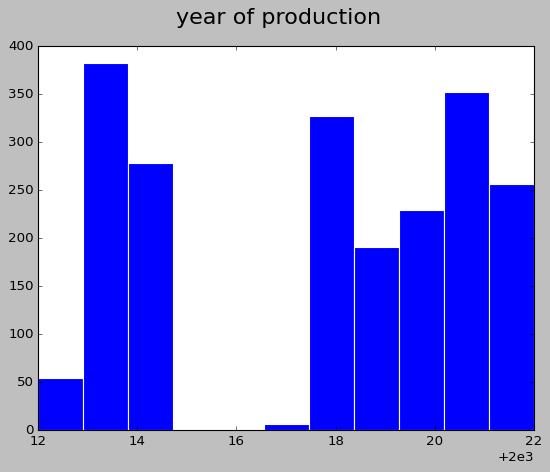

In [32]:
plt.style.use('classic')

fig, axes = plt.subplots(1, 1, figsize = (8,6))

N, bins, patches = axes.hist(reports['productYear'].tolist(), bins=11, edgecolor='white')
fig.suptitle("year of production", fontsize=20)
plt.savefig('/content/drive/MyDrive/PRAKTIKUM 6/hist.png')
;

''

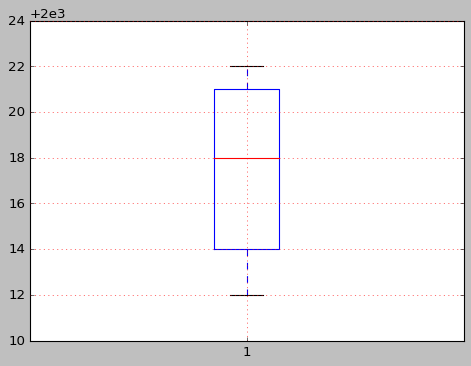

In [33]:
fig1, axes1 = plt.subplots(1, 1, figsize=(7,5))
axes1.boxplot(x=reports['productYear'].tolist())
axes1.set_ylim(2010, 2024)
axes1.grid(color=(1, 0, 0))
plt.savefig('/content/drive/MyDrive/PRAKTIKUM 6/moustache.png')
;

''

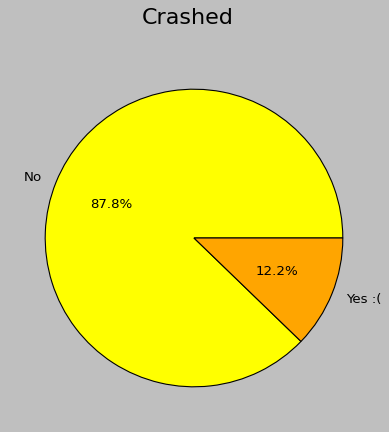

In [34]:
fig2, axes2 = plt.subplots(1, 1, figsize=(6,6))

values, counts = np.unique(np.array(reports['crash'].tolist()), return_counts=True)

fig2.suptitle("Crashed", fontsize=20)
pie_colors=['yellow', 'orange']
axes2.pie(counts, labels=['No', 'Yes :('], autopct='%1.1f%%', colors=pie_colors)
plt.savefig('/content/drive/MyDrive/PRAKTIKUM 6/pie.png')
;

In [35]:
reps_prepared = reports.copy()

reps_prepared.drop(columns=['manufacturer', 'odiNumber','dateOfIncident','dateComplaintFiled','vin','description','type','productMake'], inplace=True)

models_values = set(reps_prepared['productModel'].tolist())
models = dict(zip(models_values, [i for i in range(len(models_values))]))
models

{'MODEL 3': 0, 'MODEL X': 1, 'MODEL S': 2, 'MODEL Y': 3}

In [36]:
values_list = [x.split(",") for x in tuple(reps_prepared['components'].tolist())]

values = []

for i in values_list:
  values += i

values = set(values)
components = dict(zip(values, [i for i in range(len(values))]))
components

{'ENGINE': 0,
 ' Harness': 1,
 'BACK OVER PREVENTION': 2,
 'STEERING': 3,
 'LATCHES/LOCKS/LINKAGES': 4,
 'VEHICLE SPEED CONTROL': 5,
 'LANE DEPARTURE': 6,
 'Chest Clip': 7,
 'FORWARD COLLISION AVOIDANCE': 8,
 'FUEL/PROPULSION SYSTEM': 9,
 ' Buckle': 10,
 ' HYDRAULIC': 11,
 'SEATS': 12,
 ' GASOLINE': 13,
 'WHEELS': 14,
 'VISIBILITY/WIPER': 15,
 'SUSPENSION': 16,
 'EQUIPMENT': 17,
 'ELECTRICAL SYSTEM': 18,
 'ELECTRONIC STABILITY CONTROL': 19,
 'SERVICE BRAKES': 20,
 'VISIBILITY': 21,
 'FIRERELATED': 22,
 'POWER TRAIN': 23,
 'EXTERIOR LIGHTING': 24,
 'TIRES': 25,
 'STRUCTURE': 26,
 'AIR BAGS': 27,
 'UNKNOWN OR OTHER': 28,
 'SEAT BELTS': 29,
 'FUEL SYSTEM': 30}

In [37]:
reps_prepared['productModel'] = reps_prepared['productModel'].map(
    lambda x : models[x]
)
reps_prepared['components'] = reps_prepared['components'].map(
    lambda x : x.split(",")
)
reps_prepared['components'] = reps_prepared['components'].map(
    lambda x : [components[i] for i in x]
)
reps_prepared

,crash,fire,numberOfInjuries,numberOfDeaths,components,productYear,productModel
0,False,False,0,0,[18],2012,2
1,False,False,0,0,"[18, 15]",2012,2
2,False,False,0,0,"[18, 28]",2012,2
3,False,False,0,0,"[18, 24]",2012,2
4,False,False,0,0,"[24, 21, 2]",2012,2
...,...,...,...,...,...,...,...
2078,False,False,0,0,[14],2022,1
2079,False,False,0,0,"[27, 29, 28]",2022,1
2080,False,False,0,0,"[5, 20, 8]",2022,1
2081,True,False,0,0,[6],2022,1


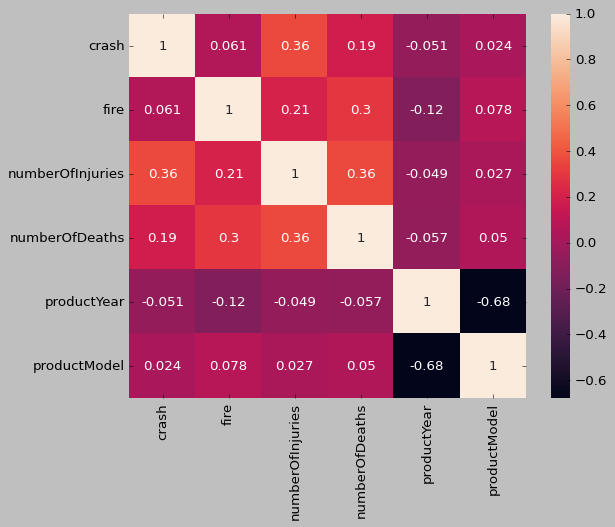

In [38]:
sb.heatmap(reps_prepared.corr(), annot=True, )
plt.savefig('/content/drive/MyDrive/PRAKTIKUM 6/heatmap.png')

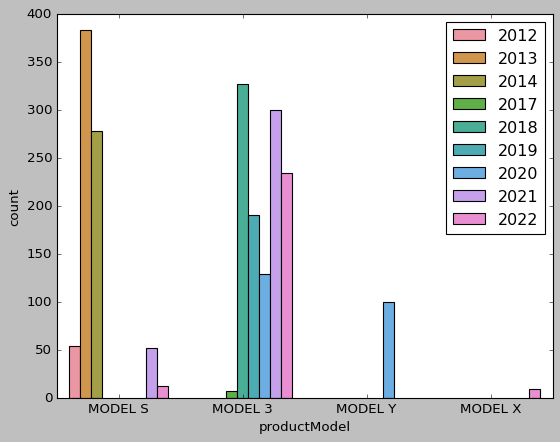

In [39]:
sb.countplot(x = 'productModel', hue='productYear', data=reports)
plt.legend(loc='upper right')
plt.savefig('/content/drive/MyDrive/PRAKTIKUM 6/count.png')

In [40]:
reports.isnull().sum()

odiNumber              0
manufacturer           0
crash                  0
fire                   0
numberOfInjuries       0
numberOfDeaths         0
dateOfIncident         0
dateComplaintFiled     0
vin                   56
components             0
description            0
type                   0
productYear            0
productMake            0
productModel           0
dtype: int64

In [19]:
# пропущенные значения только в столбце 'vin'

In [43]:
mode = reports['vin'].mode()[0]
mode
reports.loc[reports['vin'].isnull(), 'vin'] = mode

In [44]:
reports.isnull().sum()

odiNumber             0
manufacturer          0
crash                 0
fire                  0
numberOfInjuries      0
numberOfDeaths        0
dateOfIncident        0
dateComplaintFiled    0
vin                   0
components            0
description           0
type                  0
productYear           0
productMake           0
productModel          0
dtype: int64

In [45]:
sliced = reports['numberOfInjuries'].iloc[0:199]
stats.normaltest(sliced)

NormaltestResult(statistic=426.10875271859874, pvalue=2.962511206227413e-93)

In [46]:
# p-value -> 0, значит наша выборка не является нормальным распределением

In [47]:
encoded_reports = pd.get_dummies(reports, columns=['productModel', 'productYear'])
encoded_reports

,odiNumber,manufacturer,crash,fire,numberOfInjuries,numberOfDeaths,dateOfIncident,dateComplaintFiled,vin,components,...,productModel_MODEL Y,productYear_2012,productYear_2013,productYear_2014,productYear_2017,productYear_2018,productYear_2019,productYear_2020,productYear_2021,productYear_2022
0,11444023,"Tesla, Inc.",False,False,0,0,11/18/2021,12/16/2021,5yjsa1cn8cf,ELECTRICAL SYSTEM,...,0,1,0,0,0,0,0,0,0,0
1,11442524,"Tesla, Inc.",False,False,0,0,12/01/2021,12/03/2021,5YJSA1DPXCF,"ELECTRICAL SYSTEM,VISIBILITY/WIPER",...,0,1,0,0,0,0,0,0,0,0
2,11441219,"Tesla, Inc.",False,False,0,0,11/19/2021,11/21/2021,5YJSA1CN3CF,"ELECTRICAL SYSTEM,UNKNOWN OR OTHER",...,0,1,0,0,0,0,0,0,0,0
3,11435793,"Tesla, Inc.",False,False,0,0,10/05/2021,10/06/2021,5YJSA1DPXCF,"ELECTRICAL SYSTEM,EXTERIOR LIGHTING",...,0,1,0,0,0,0,0,0,0,0
4,11434130,"Tesla, Inc.",False,False,0,0,09/22/2021,09/23/2021,5yjsa1cp0cf,"EXTERIOR LIGHTING,VISIBILITY,BACK OVER PREVENTION",...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,11462408,"Tesla, Inc.",False,False,0,0,04/25/2022,04/27/2022,7SAXCBE50NF,WHEELS,...,0,0,0,0,0,0,0,0,0,1
2079,11459186,"Tesla, Inc.",False,False,0,0,03/28/2022,04/01/2022,7SAXCBE62NF,"AIR BAGS,SEAT BELTS,UNKNOWN OR OTHER",...,0,0,0,0,0,0,0,0,0,1
2080,11458566,"Tesla, Inc.",False,False,0,0,03/27/2022,03/28/2022,7SAXCBE58NF,"VEHICLE SPEED CONTROL,SERVICE BRAKES,FORWARD C...",...,0,0,0,0,0,0,0,0,0,1
2081,11456483,"Tesla, Inc.",True,False,0,0,03/12/2022,03/13/2022,7SAXCBE51NF,LANE DEPARTURE,...,0,0,0,0,0,0,0,0,0,1


In [48]:
encoded_reports.to_csv('/content/drive/MyDrive/PRAKTIKUM 6/reports.csv', index=False, header=True)